### 이미지의 합성

* 픽셀을 합성하는 수식
    $$p_{N} = \alpha * p_{A} + (1-\alpha) * p_{B}$$
* $\alpha$가 1이 되면 두번째 항은 연산하지 않는다. = 첫번째 이미지만 사용한다.

In [11]:
# 2-2-07.py

# 원본 이미지 파일 읽어오기

# 외부 모듈 읽어오기
import numpy as np
import matplotlib.pyplot as plt 
import PIL.Image as pilimg                    # 이미지 처리를 하기 위한 외부 이미지

# Step 1 : 원본 이미지 파일 읽어오기
# image file 읽어오기
im1 = pilimg.open("2_실습파일(2-2-4_이미지데이터가공하기)/jeju_summer.jpg")          # 배경 이미지 열기
im2 = pilimg.open("2_실습파일(2-2-4_이미지데이터가공하기)/baby1.jpg")                # 조카 이미지1  열기
im3 = pilimg.open("2_실습파일(2-2-4_이미지데이터가공하기)/baby2.jpg")                # 조카 이미지2  열기

print(im1)
print(im2)
print(im3)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x810 at 0x25AA365A668>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2302x1536 at 0x25AA365A630>
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2302x1536 at 0x25AA2F64DD8>


`print(im1/2/3)`의 출력결과

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1440x810 at 0x25AA2F2D710>

image mode, size, at 등의 정보를 알 수 있다.
* at: 사진 파일이 해당 컴퓨터 메모리의 어디에 위치하고 있는지 출력

=> 세 사진의 크기가 전부 다름을 알 수 있다.

In [12]:
# Step 2 : 읽어온 두 이미지 합성하기
pix1 = np.array(im1)                          # image data를 numpy array로 구성
              
# 조카 사진을 이어붙이기 위해 배경에 맞추어 변경할 크기 계산하기
# 만약 배경 화면의 가로 크기가 홀수이면 첫번째 이미지의 가로 크기를 반올림하기
resizeX2 = pix1.shape[1]/2                    # 홀수인지 체크
if( pix1.shape[1] % 2 > 0) :                  # 홀수인 경우
    resizeX1 = pix1.shape[1]/2 + 1
else :
    resizeX1 = pix1.shape[1]/2                # 짝수인 경우


# 조카 사진 2장을 나란히 붙이기 위해 배경 이미지의 절반씩 차지하도록 크기 변경하기: resize() 함수 사용
im2 = im2.resize((int(resizeX1), int(pix1.shape[0])))     # 첫번째 조카 사진 크기 변경
pix2 = np.array(im2)

im3 = im3.resize((int(resizeX2), int(pix1.shape[0])))     # 두번째 조카 사진 크기 변경
pix3 = np.array(im3)

# 조카 사진 2개를 옆으로 나란히 붙이기(axis값을 0으로 하면 세로로 설정됨.)
# 행렬을 합쳐 두 장의 이미지를 붙이는 Numpy 함수: `concatenate`
pix4 = np.concatenate((pix2, pix3), axis = 1)             # 두 사진을 가로 방향으로 붙이기

# 이미지를 블렌딩하기 위해 각 픽셀의 RGB 값을 (0~1)의 실수 범위로 정규화(normalize)
# 픽셀은 0~255 사이의 수다. 이를 255로 나누면 0과 1 사이의 실수로 바뀐다.
# 정규화: 데이터를 일정한 규칙에 따라 변형하여 이용하기 쉽게 만드는 일
pix1 = (1/255)*pix1
pix4 = (1/255)*pix4 

# 가중치 정하기(배경을 30%, 조카 이미지를 70%로 합성)
weight = 0.3

# 가중치를 적용하기 위해 원본 이미지 행렬에 가중치를 실수배하여 합하기
pix5 = pix1 * weight + pix4 * (1-weight)

# 두 원본 이미지의 가중치를 반대로 적용한 이미지 생성하기
pix6 = pix1 * (1-weight) + pix4 * weight

#### Step 2 : 읽어온 두 이미지 합성하기

1. 이미지 데이터를 Numpy array로 설정
2. 사진 크기 조절: resize()
    * 조카 사진의 가로를 배경사진의 1/2 크기로 조정
3. 두 장의 이미지를 가로로 이어붙이기
    * `concatenate`: 행렬을 합쳐 두 장의 이미지를 붙이는 Numpy 함수
4. 이미지 블렌딩: 각 픽셀값을 0~1 실수 범위로 정규화
    * 정규화: 데이터를 일정한 규칙에 따라 변형하여 이용하기 쉽게 만드는 일
    * 픽셀은 0~255 사이의 수이므로 이를 255로 나누면 0과 1 사이의 실수로 바뀐다.
5. 가중치 정하기 (배경을 얼마나 진하게 할지 ... )
    * `weight = 0.3`
    * 가중치를 1로 하면 합성이 일어나지 않는다.
6. 가중치 적용: 원본 이미지 행렬에 가중치 실수배
    * 픽셀 합성 수식: $$p_{N} = \alpha * p_{A} + (1-\alpha) * p_{B}$$

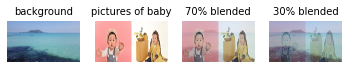

In [13]:

# Step 3 합성한 이미지 출력하기
# 배경 이미지, 조카 사진 이미지와 합성한 이미지를 출력 
plt.subplot(141)
plt.imshow(pix1)
plt.axis("off")
plt.title("background", fontsize=10)          # 배경 이미지 출력

plt.subplot(142)
plt.imshow(pix4)
plt.axis("off")
plt.title("pictures of baby", fontsize=10)                 # 조카 사진 이미지 출력

plt.subplot(143)
plt.imshow(pix5)
plt.axis("off")
plt.title("70% blended", fontsize=10)                       # 두 개의 조카 사진을 70% 합성한 이미지 출력

plt.subplot(144)
plt.imshow(pix6)
plt.axis("off")
plt.title("30% blended", fontsize=10)                       # 두 개의 조카 사진을 30% 합성한 이미지 출력

plt.show()



In [14]:
# 2-2-08.py

# 합성한 이미지 저장하기
# Step 4 합성한 이미지 저장하기
# ---------------------------------------------------------------------

pix5 = pix5*255
im5 = pilimg.fromarray(pix5.astype(np.uint8))
im5.save("BlendedPic_70.png")

pix6 = pix6*255
im6 = pilimg.fromarray(pix6.astype(np.uint8))
im6.save("BlendedPic_30.png")

* 사진을 저장할때는 pillow를 사용한다.
* `unit8` = 8bit unsigned integer (8bit 부호가 없는 정수)

<hr>

### 컬러 이미지를 흑백 이미지로 바꾸기
* 방법: R, G, B에 적당한 실숫값 곱하기

In [24]:
# 2-2-09.py

# 컬러 이미지를 흑백 이미지로 만들기

import numpy as np                  # 외부 모듈   
import matplotlib.pyplot as plt
import PIL.Image as pilimg

# [추가] 사진의 크기를 줄여 시간 단축하기
import time    # 시간 측정을 위한 모듈 import
start = time.time()    # 시작 시간을 start에 저장

im1 = pilimg.open("2_실습파일(2-2-4_이미지데이터가공하기)/baby1.jpg")      # image file 읽어오기 

# [추가] 이미지 리사이징
# `//` 정수 나눗셈 연산기호
im1 = im1.resize((im1.width//4, im1.height//4))

# image data를 numpy array로 구성
pix1 = np.array(im1)
pix1 = (1/255)*pix1    # 정규화
pixSize1 = np.array(pix1.shape)

pix2 = np.empty(pixSize1)

# [추가] 가장 시간이 오래 걸리는 부분
for i in range(pixSize1[0]) :
    for j in range(pixSize1[1]) :
        # pix1[i][j][0] 에서 0은 R
        # pix1[i][j][0] 에서 1은 G
        # pix1[i][j][0] 에서 2는 B
        grayPix = 0.2126*pix1[i][j][0] + 0.7152*pix1[i][j][1] + 0.0722*pix1[i][j][2]   # 회색톤으로 변환
        pix2[i,j] = (grayPix, grayPix, grayPix)

# [추가] 작업시간 출력
# 리사이징 전: Time:  22.24916434288025
# 리사이징 후: Time:  1.4437434673309326
print("Time: ", time.time() - start)

Time:  1.4437434673309326


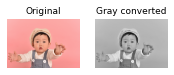

In [23]:
# RGB의 값을 모두 회색톤으로 지정
plt.subplot(141)
plt.imshow(pix1)                  # 원래 이미지 출력                       
plt.axis("off")
plt.title("Original", fontsize=9)

plt.subplot(142)
plt.imshow(pix2)                  # 회색톤으로 변환한 이미지 출력
plt.axis("off")
plt.title("Gray converted", fontsize=9)

plt.show()


### 컬러 이미지를 흑백 이미지로 바꾸기: Pillow
* for loop 부분을 전부 삭제
* 바꿀 이미지 = 원래이미지.convert('LA')

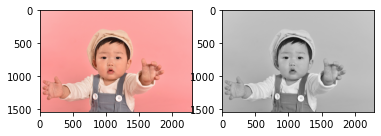

In [26]:
# 컬러 이미지를 흑백 이미지로 만들기

import matplotlib.pyplot as plt
import PIL.Image as pilimg


im1 = pilimg.open("2_실습파일(2-2-4_이미지데이터가공하기)/baby1.jpg")      # image file 읽어오기 
im2 = im1.convert('LA') # grey scale convert


plt.subplot(121)
plt.imshow(im1)                  # 원래 이미지 출력                       
plt.subplot(122)
plt.imshow(im2)                  # 회색톤으로 변환한 이미지 출력

plt.show()
